## Third function: Mapping data

** The objective of the function is to calculate seasonal precipitation averages.**

The function will be of the type:
```
def seasonal average(file1, file2, file3, title, path to figure):
    get precipitation data
    calculate average
    using matplotlib display map of precipitation 
    provide title to the figure
    save map 
    display map (this is optional and is only included to show the final output)
```

The map below shows average rain rates for the last quarter of 2015 (October, November, December). In climatology, seasons are normally as follows: boreal spring (March, April, May), boreal summer (June, July, August), boreal autumn, (September, October, November), boreal winter (December, January, February). These seasons will be used for the report that will be prepared for EEB234.

Note: The long-term average requires different calculations and slightly different manipulations, so another function will be prepared accordingly. Because several files will be analyzed, a for loop will be included as well.

Data and maps produced are included in the data/2015 repository within the eeb-177-final-project repo in github.

/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3630: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3699: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


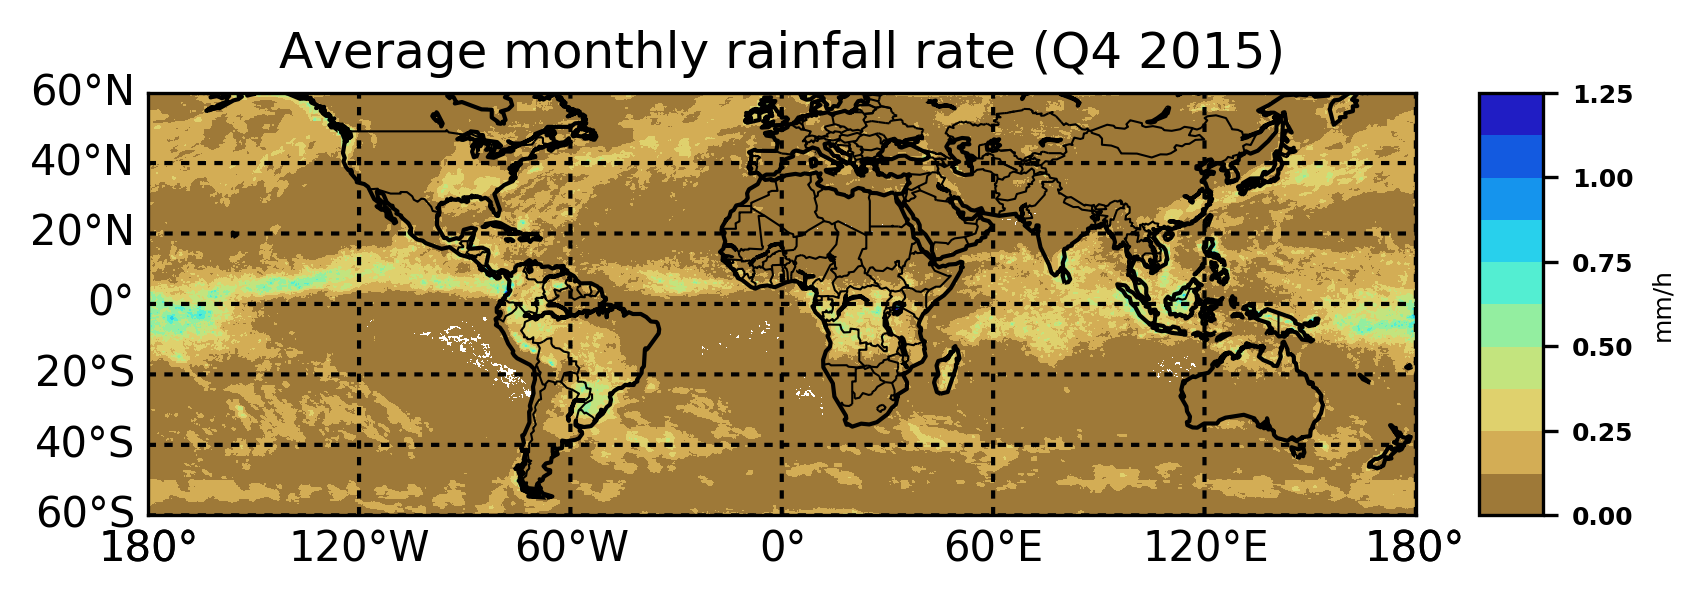

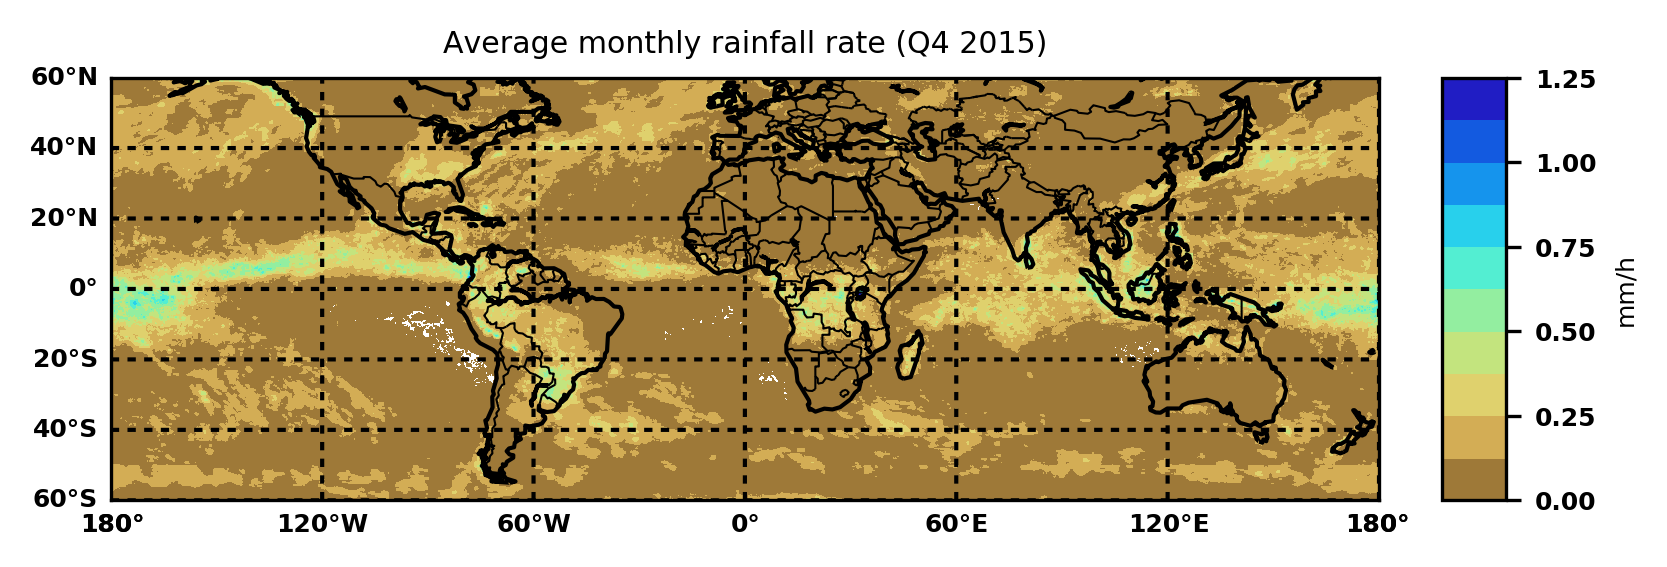

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2]:
# importing modules and libraries
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py as h5py

def season_average(file1, file2, file3, title_name, figure_path):
    # the function calculates the difference between file12 and file1

    # read precipitation data from file1
    File1 = h5py.File(file1, 'r') 
    precip1 = File1['Grid/precipitation'][:]
    precip1 = np.transpose(precip1)
    # assign geography to values
    theLats1 = File1['Grid/lat'][:]
    theLonsNov = File1['Grid/lon'][:]

    #repeat for file2
    File2 = h5py.File(file2, 'r') 
    precip2 = File2['Grid/precipitation'][:]
    precip2 = np.transpose(precip2)
    theLats2 = File2['Grid/lat'][:]
    theLons2 = File2['Grid/lon'][:]    
    
    #repeat for file3
    File3 = h5py.File(file3, 'r') 
    precip3 = File3['Grid/precipitation'][:]
    precip3 = np.transpose(precip3)
    theLats3 = File3['Grid/lat'][:]
    theLons3 = File3['Grid/lon'][:]
    
    # calculate difference
    precipmean = (precip3 + precip2 + precip1) / 3
    
    # Plot the figure, define the geographic bounds
    fig = plt.figure(dpi=300)
    latcorners = ([-60,60])
    loncorners = ([-180,180])

    m = Basemap(projection='cyl',llcrnrlat=latcorners[0],urcrnrlat=latcorners[1],llcrnrlon=loncorners[0],urcrnrlon=loncorners[1])

    # Draw coastlines, state and country boundaries, edge of map.

    m.drawcoastlines()
    # m.drawstates()
    m.drawcountries()

    # Draw filled contours.
    clevs = np.arange(0,1.26,0.125)

    # Define the latitude and longitude data
    x, y = np.float32(np.meshgrid(theLons2, theLats2))
    #X, Y = np.meshgrid(x,y)
    
    # Mask the values less than 0 because there is no data to plot.
    masked_array = np.ma.masked_where(precipmean < -9,precipmean) # this needed to be corrected - it was incorrectly typed in the data recipe!
    
    # Plot every masked value as white
    cmap = cm.GMT_drywet
    cmap.set_bad('w',1.)

    # Plot the data
    cs = m.contourf(x,y,precipmean,clevs,cmap=cmap,latlon=True)
    #m.contourf(data = precip, x = X, y = Y)
    parallels = np.arange(-60.,61,20.)
    m.drawparallels(parallels,labels=[True,False,True,False])
    meridians = np.arange(-180.,180.,60.)
    m.drawmeridians(meridians,labels=[False,False,False,True])

    #Set the title and fonts
    plt.title(title_name)
    font = {'weight' : 'bold', 'size' : 6}
    plt.rc('font', **font)

    #Add colorbar
    cbar = m.colorbar(cs,location='right',pad="5%")
    cbar.set_label('mm/h')
    plt.savefig(figure_path,dpi=200)

    image = mpimg.imread(figure_path)
    plt.imshow(image)
    plt.show(image)
    
season_average(file1 = "/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/3B-MO.MS.MRG.3IMERG.20151201-S000000-E235959.12.V03D.HDF5"\
           , file2 = "/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/3B-MO.MS.MRG.3IMERG.20151101-S000000-E235959.11.V03D.HDF5"\
          , file3 = "/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/3B-MO.MS.MRG.3IMERG.20151001-S000000-E235959.10.V03D.HDF5"\
        , title_name = "Average monthly rainfall rate (Q4 2015)", \
          figure_path = "/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/mean-2015-Q4.png")